Using the Titanic dataset, create a Python class to perform basic exploratory data analysis (EDA). Implement methods to visualize the distribution of survival rates based on different features such as 'Pclass', 'Sex', and 'Age'. Use Matplotlib for visualization.
Requirements:

Create a class TitanicEDA with methods to load data, generate summary statistics, and create visualizations.
Use Pandas for data manipulation.
Visualize the distribution of survival rates and other features.
Save visualizations as image files.

Data Loaded Successfully
Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values:
PassengerId      0


<ipython-input-4-43fd866d8037>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=self.df, ci=None)


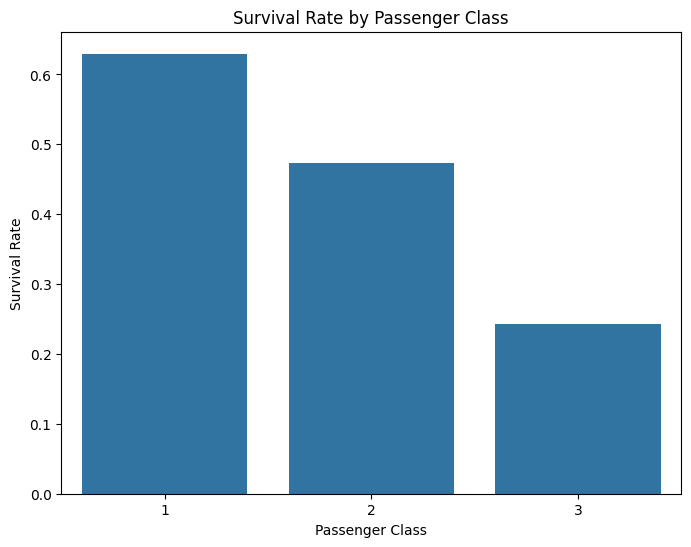

<ipython-input-4-43fd866d8037>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=self.df, ci=None)


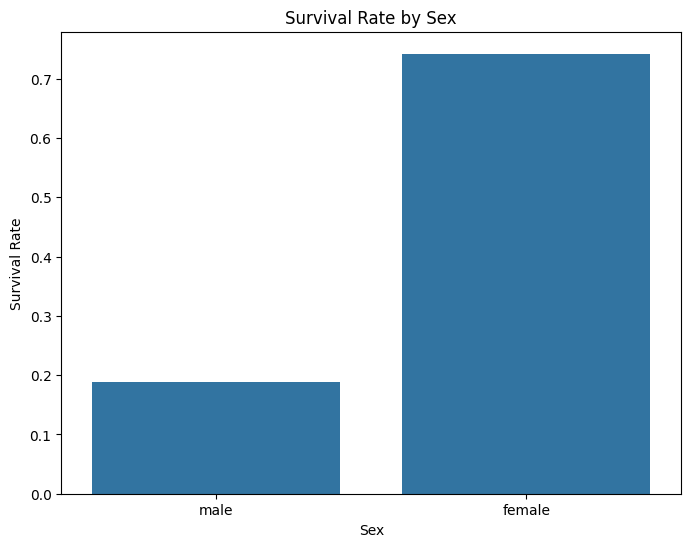

<ipython-input-4-43fd866d8037>:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=self.df, ci=None)


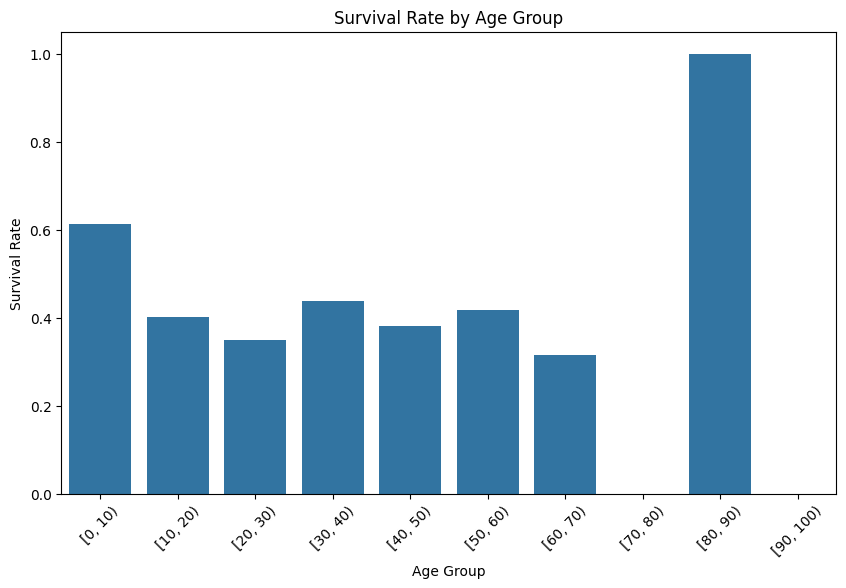

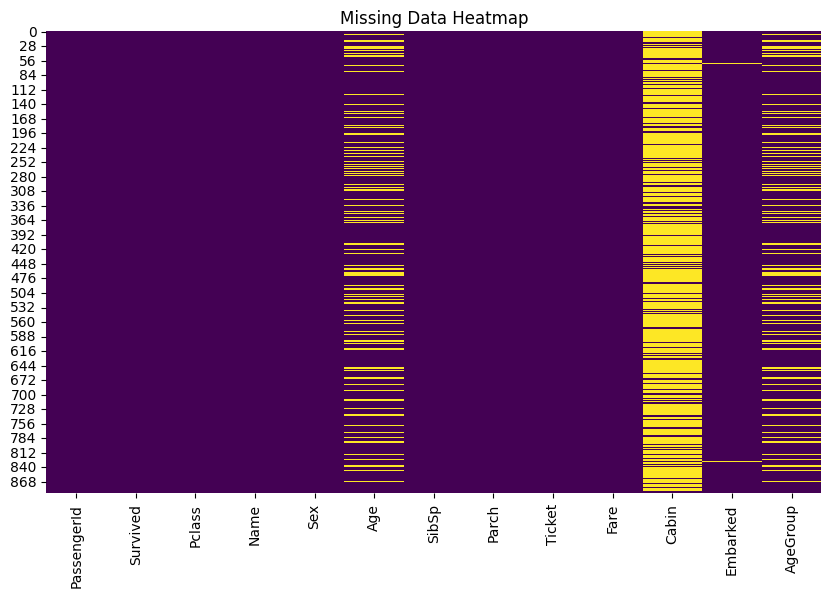

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class TitanicEDA:
    def __init__(self, data_path):
        """Initialize with the path to the dataset."""
        self.data_path = data_path
        self.df = None

    def load_data(self):
        """Load the Titanic dataset into a Pandas DataFrame."""
        self.df = pd.read_csv(self.data_path)
        print("Data Loaded Successfully")

    def generate_summary_statistics(self):
        """Generate summary statistics for the dataset."""
        if self.df is not None:
            print("Summary Statistics:")
            print(self.df.describe())
            print("\nMissing Values:")
            print(self.df.isnull().sum())
        else:
            print("Data not loaded. Please load the data first.")

    def visualize_survival_rate_by_pclass(self):
        """Visualize the distribution of survival rates by 'Pclass'."""
        if self.df is not None:
            plt.figure(figsize=(8, 6))
            sns.barplot(x='Pclass', y='Survived', data=self.df, ci=None)
            plt.title('Survival Rate by Passenger Class')
            plt.xlabel('Passenger Class')
            plt.ylabel('Survival Rate')
            plt.savefig('survival_rate_by_pclass.png')
            plt.show()
        else:
            print("Data not loaded. Please load the data first.")

    def visualize_survival_rate_by_sex(self):
        """Visualize the distribution of survival rates by 'Sex'."""
        if self.df is not None:
            plt.figure(figsize=(8, 6))
            sns.barplot(x='Sex', y='Survived', data=self.df, ci=None)
            plt.title('Survival Rate by Sex')
            plt.xlabel('Sex')
            plt.ylabel('Survival Rate')
            plt.savefig('survival_rate_by_sex.png')
            plt.show()
        else:
            print("Data not loaded. Please load the data first.")

    def visualize_survival_rate_by_age(self):
        """Visualize the distribution of survival rates by 'Age'."""
        if self.df is not None:
            # Binning the age column to avoid too many distinct values
            age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
            self.df['AgeGroup'] = pd.cut(self.df['Age'], bins=age_bins, right=False)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='AgeGroup', y='Survived', data=self.df, ci=None)
            plt.title('Survival Rate by Age Group')
            plt.xlabel('Age Group')
            plt.ylabel('Survival Rate')
            plt.xticks(rotation=45)
            plt.savefig('survival_rate_by_age.png')
            plt.show()
        else:
            print("Data not loaded. Please load the data first.")

    def visualize_missing_data(self):
        """Visualize the missing data in the dataset."""
        if self.df is not None:
            plt.figure(figsize=(10, 6))
            sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis')
            plt.title('Missing Data Heatmap')
            plt.savefig('missing_data_heatmap.png')
            plt.show()
        else:
            print("Data not loaded. Please load the data first.")

# Example usage:

# Initialize the TitanicEDA class with the path to the Titanic dataset
titanic_eda = TitanicEDA('/content/Titanic-Dataset.csv')

# Load the data
titanic_eda.load_data()

# Generate summary statistics
titanic_eda.generate_summary_statistics()

# Visualize survival rates based on different features
titanic_eda.visualize_survival_rate_by_pclass()
titanic_eda.visualize_survival_rate_by_sex()
titanic_eda.visualize_survival_rate_by_age()

# Visualize missing data
titanic_eda.visualize_missing_data()


Implement a custom iterator to process the Mall Customer Segmentation dataset. The iterator should stream data in chunks and allow for incremental analysis.
Requirements

Create a ChunkIterator class to iterate over chunks of the dataset.
Implement a method to calculate and return basic statistics for each chunk.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
class ChunkIterator:
    def __init__(self, file_path, chunk_size):
        """
        Initialize the ChunkIterator.

        Args:
            file_path (str): Path to the dataset file.
            chunk_size (int): Number of rows per chunk.
        """
        self.file_path = file_path
        self.chunk_size = chunk_size
        self.iterator = pd.read_csv(file_path, chunksize=chunk_size)

    def __iter__(self):
        """
        Make the class iterable.
        """
        return self

    def __next__(self):
        """
        Fetch the next chunk of data.

        Returns:
            pd.DataFrame: The next chunk of data.
        """
        try:
            chunk = next(self.iterator)
            return chunk
        except StopIteration:
            raise StopIteration("No more chunks available.")

    def calculate_statistics(self, chunk):
        """
        Calculate basic statistics for the given chunk.

        Args:
            chunk (pd.DataFrame): A chunk of data.

        Returns:
            dict: A dictionary of statistics for numeric columns.
        """
        stats = {}
        numeric_cols = chunk.select_dtypes(include=np.number).columns

        for col in numeric_cols:
            stats[col] = {
                "mean": chunk[col].mean(),
                "median": chunk[col].median(),
                "std": chunk[col].std(),
                "min": chunk[col].min(),
                "max": chunk[col].max(),
            }

        return stats


In [ ]:
if __name__ == "__main__":
    # File path to the Mall Customer Segmentation dataset
    file_path = "/content/Mall_Customers.csv"

    # Initialize the ChunkIterator with a chunk size of 50 rows
    chunk_iterator = ChunkIterator(file_path=file_path, chunk_size=50)

    print("Processing dataset in chunks...\n")

    for i, chunk in enumerate(chunk_iterator):
        print(f"Chunk {i + 1}:")

        # Calculate statistics for the chunk
        stats = chunk_iterator.calculate_statistics(chunk)

        # Print the statistics
        for column, stat_values in stats.items():
            print(f"  {column}: {stat_values}")

        print("\n---\n")


Processing dataset in chunks...

Chunk 1:
  CustomerID: {'mean': 25.5, 'median': 25.5, 'std': 14.577379737113251, 'min': 1, 'max': 50}
  Age: {'mean': 35.28, 'median': 31.0, 'std': 13.751497135562651, 'min': 18, 'max': 67}
  Annual Income (k$): {'mean': 27.4, 'median': 28.0, 'std': 8.369039151929606, 'min': 15, 'max': 40}
  Spending Score (1-100): {'mean': 49.48, 'median': 44.5, 'std': 30.217740430659173, 'min': 3, 'max': 99}

---

Chunk 2:
  CustomerID: {'mean': 75.5, 'median': 75.5, 'std': 14.577379737113251, 'min': 51, 'max': 100}
  Age: {'mean': 44.22, 'median': 47.0, 'std': 16.232104746144163, 'min': 18, 'max': 70}
  Annual Income (k$): {'mean': 51.72, 'median': 54.0, 'std': 6.023897985422356, 'min': 42, 'max': 61}
  Spending Score (1-100): {'mean': 50.38, 'median': 50.5, 'std': 5.8340660375601034, 'min': 40, 'max': 60}

---

Chunk 3:
  CustomerID: {'mean': 125.5, 'median': 125.5, 'std': 14.577379737113251, 'min': 101, 'max': 150}
  Age: {'mean': 38.58, 'median': 36.5, 'std': 14.7

Create a decorator to time the execution of methods in a class that processes data from the Supermarket Sales dataset. The class should include methods to summarize data and plot sales over time.
Requirements:

Implement a timing_decorator to measure execution time.
Create a SalesDataProcessor class with methods to process and visualize sales data.
Apply the decorator to these methods.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from functools import wraps


In [ ]:
def timing_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time for {func.__name__}: {execution_time:.2f} seconds")
        return result
    return wrapper


In [ ]:
class SalesDataProcessor:
    def __init__(self, file_path):
        """
        Initialize the processor with the dataset.

        Args:
            file_path (str): Path to the dataset file.
        """
        self.file_path = file_path
        self.data = pd.read_csv(file_path, parse_dates=["Date"])

    @timing_decorator
    def summarize_sales(self):
        """
        Summarize the sales data.
        """
        total_sales = self.data["Total"].sum()
        average_sales = self.data["Total"].mean()
        max_sale = self.data["Total"].max()
        min_sale = self.data["Total"].min()

        print("Sales Summary:")
        print(f"  Total Sales: ${total_sales:.2f}")
        print(f"  Average Sale: ${average_sales:.2f}")
        print(f"  Maximum Sale: ${max_sale:.2f}")
        print(f"  Minimum Sale: ${min_sale:.2f}")

    @timing_decorator
    def plot_sales_over_time(self):
        """
        Plot sales over time.
        """
        sales_over_time = self.data.groupby("Date")["Total"].sum()

        plt.figure(figsize=(10, 6))
        sales_over_time.plot(kind="line", marker="o", color="blue")
        plt.title("Total Sales Over Time")
        plt.xlabel("Date")
        plt.ylabel("Total Sales ($)")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("sales_over_time.png")
        plt.show()
        print("Sales plot saved as 'sales_over_time.png'")


Sales Summary:
  Total Sales: $322966.75
  Average Sale: $322.97
  Maximum Sale: $1042.65
  Minimum Sale: $10.68
Execution time for summarize_sales: 0.00 seconds


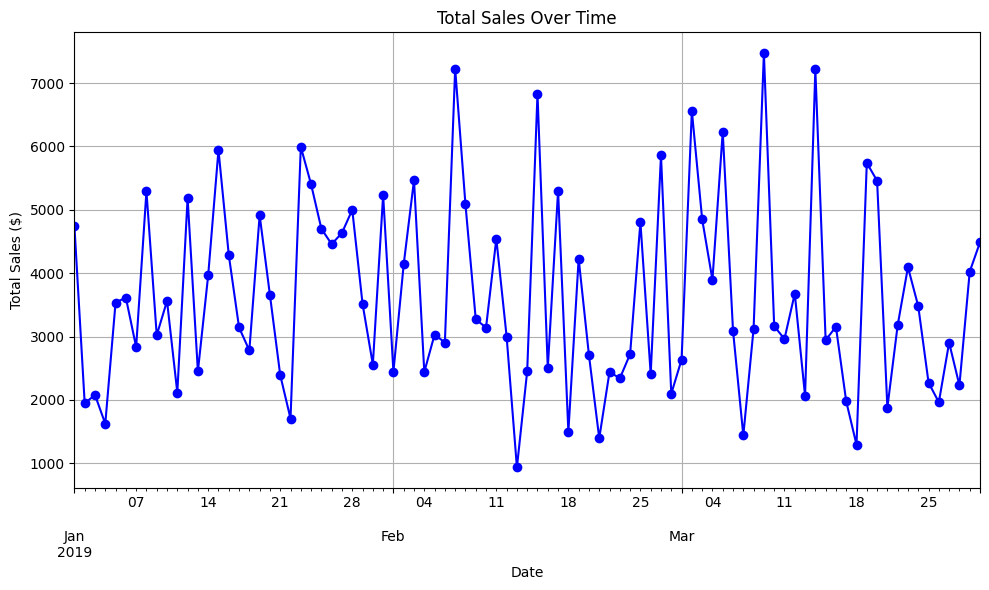

Sales plot saved as 'sales_over_time.png'
Execution time for plot_sales_over_time: 1.36 seconds


In [ ]:
if __name__ == "__main__":
    # Path to the Supermarket Sales dataset
    file_path = "/content/supermarket_sales - Sheet1.csv"

    # Initialize the SalesDataProcessor
    processor = SalesDataProcessor(file_path=file_path)

    # Summarize the sales data
    processor.summarize_sales()

    # Plot sales over time
    processor.plot_sales_over_time()
